## Species

### Prey
Table Coral                     - $\rho_1(t)$ 

Branch Coral                    - $\rho_2(t)$

### Predator
Crown of Thorns Starfish (CoT)  - $\beta(t)$ 

## Assumptions

- CoT only consumes two types of coral, Table and Branch
- CoT consumes Branch coral at a faster rate than Table coral, b>a
- Both corals grow independent of each other
- Prey will grow in the absense of predators
- Predator will encounter prey based on principles of mass action
- The effect of environmental factors, others predators, etc. is ignored
- CoT populations are contained to the Northern section of the reef

## Predator Prey System
\begin{align}
\frac{\partial \rho_1}{\partial t} &= P_1\rho_1 - a\rho_1\beta \\
\frac{\partial \rho_2}{\partial t} &= P_2\rho_2 - b\rho_2\beta \\
\frac{\partial \beta}{\partial t} &= (a\rho_1+b\rho_2)\beta - d\beta
\end{align}

In [3]:
from scipy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib notebook

In [43]:
time = r_[0:34:1000j]

In [59]:
def dxdt_normal(x,t,a=0.25,b=.5,d=1,P1=0.5,P2=1):
    '''Lotka-Volterra predator prey system.'''
    d1 = P1*x[0]-a*x[0]*x[2]
    d2 = P2*x[1]-b*x[1]*x[2]
    d3 = (a*x[0]+b*x[1])*x[2]-d*x[2]
    return(d1, d2, d3)

In [72]:
def dxdt_harvest(x,t,a=0.25,b=.5,d=1,P1=0.5,P2=1):
    '''Lotka-Volterra predator prey system. All terms remain the same,
    but harvesting of the starfish by humans has been included as a
    factor'''
    d1 = P1*x[0]-a*x[0]*x[2]
    d2 = P2*x[1]-b*x[1]*x[2]
    d3 = (a*x[0]+b*x[1])*x[2]-d*x[2]-0.06*x[2]
    return(d1, d2, d3)

In [61]:
x = odeint(dxdt_normal,[1,1,15],time)

<IPython.core.display.Javascript object>


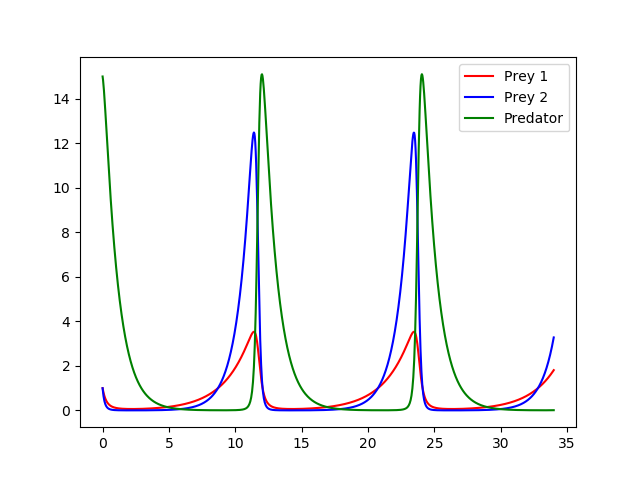

In [62]:
plt.figure()
plt.plot(time,x[:,0],'r')
plt.plot(time,x[:,1],'b')
plt.plot(time,x[:,2],'g')
plt.legend(('Prey 1','Prey 2','Predator'))
plt.show()

In [73]:
x = odeint(dxdt_harvest,[1,1,15],time)

<IPython.core.display.Javascript object>


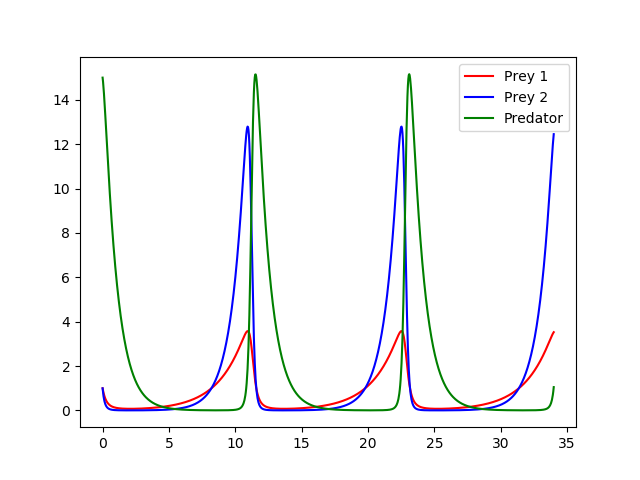

In [74]:
plt.figure()
plt.plot(time,x[:,0],'r')
plt.plot(time,x[:,1],'b')
plt.plot(time,x[:,2],'g')
plt.legend(('Prey 1','Prey 2','Predator'))
plt.show()